# S\[\[5,1,2\]\] Surface code demonstration
## Main code definitions

In [107]:
import qiskit
import qiskit.tools.parallel

qiskit.__qiskit_version__

from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_state_qsphere

from qiskit.providers.ibmq import least_busy

from numpy import *
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_aer import AerSimulator

In [108]:
nb_n = int(5)
nb_k = int(1)
nb_d = int(2)
nb_m = nb_n - nb_k

print("S={X1X2X3, Z1Z3Z4, Z2Z3Z5, X3X4X5}")
X1 = int(0); X2 = int(1) ; X3 = int(2); X4 = int(3); X5 = int(4)
Z1 = int(0); Z2 = int(1); Z3 = int(2); Z4 = int(3); Z5 = int(4)
A1 = int(0); A2 = int(1); A3 = int(2); A4 = int(3)


print(f"Stabilizer Code [[n,k,d]] = [[{nb_n},{nb_k},{nb_d}]]")
print(f"m = {nb_m}")

simulator = Aer.get_backend('qasm_simulator')

S={X1X2X3, Z1Z3Z4, Z2Z3Z5, X3X4X5}
Stabilizer Code [[n,k,d]] = [[5,1,2]]
m = 4


In [109]:
data_q = QuantumRegister(nb_n)
ancilla_q = AncillaRegister(nb_m)
cl_reg = ClassicalRegister(nb_m)

q_circuit = QuantumCircuit(data_q, ancilla_q, cl_reg)

for n in range(nb_n):
    q_circuit.reset(data_q[n])
    if n < 4:
        q_circuit.reset(ancilla_q[n])
        q_circuit.h(ancilla_q[n])

q_circuit.barrier()
# Entangles the control qubits
q_circuit.h(data_q[0])
for n in range(1,nb_n):
    q_circuit.cx(data_q[n-1], data_q[n])

## Connect the stabilizers with the Ancilla qubits
X1X2X3: D1D2D3 ->(A1)

In [110]:
q_circuit.barrier()

q_circuit.cx(data_q[X1], ancilla_q[A1])
q_circuit.cx(data_q[X2], ancilla_q[A1])
q_circuit.cx(data_q[X3], ancilla_q[A1])

X3X4X5: D3D4D5 ->(A4)

In [111]:
q_circuit.barrier()

q_circuit.cx(data_q[X3], ancilla_q[A4])
q_circuit.cx(data_q[X4], ancilla_q[A4])
q_circuit.cx(data_q[X5], ancilla_q[A4])

Z1Z3Z4: D1D3D4 ->(A2)

In [112]:
q_circuit.barrier()

q_circuit.cz(data_q[Z1], ancilla_q[A2])
q_circuit.cz(data_q[Z3], ancilla_q[A2])
q_circuit.cz(data_q[Z4], ancilla_q[A2])

Z2Z3Z5: D2D3D5 ->(A3)

In [113]:
q_circuit.barrier()

q_circuit.cz(data_q[Z2], ancilla_q[A3])
q_circuit.cz(data_q[Z3], ancilla_q[A3])
q_circuit.cz(data_q[Z5], ancilla_q[A3])

## Time to prepare for the read-out

In [114]:
q_circuit.barrier()

for n in range(nb_m):
    q_circuit.h(ancilla_q[n])

# make the measurements
for n in range(nb_m):
    q_circuit.measure(ancilla_q[n], cl_reg[n])

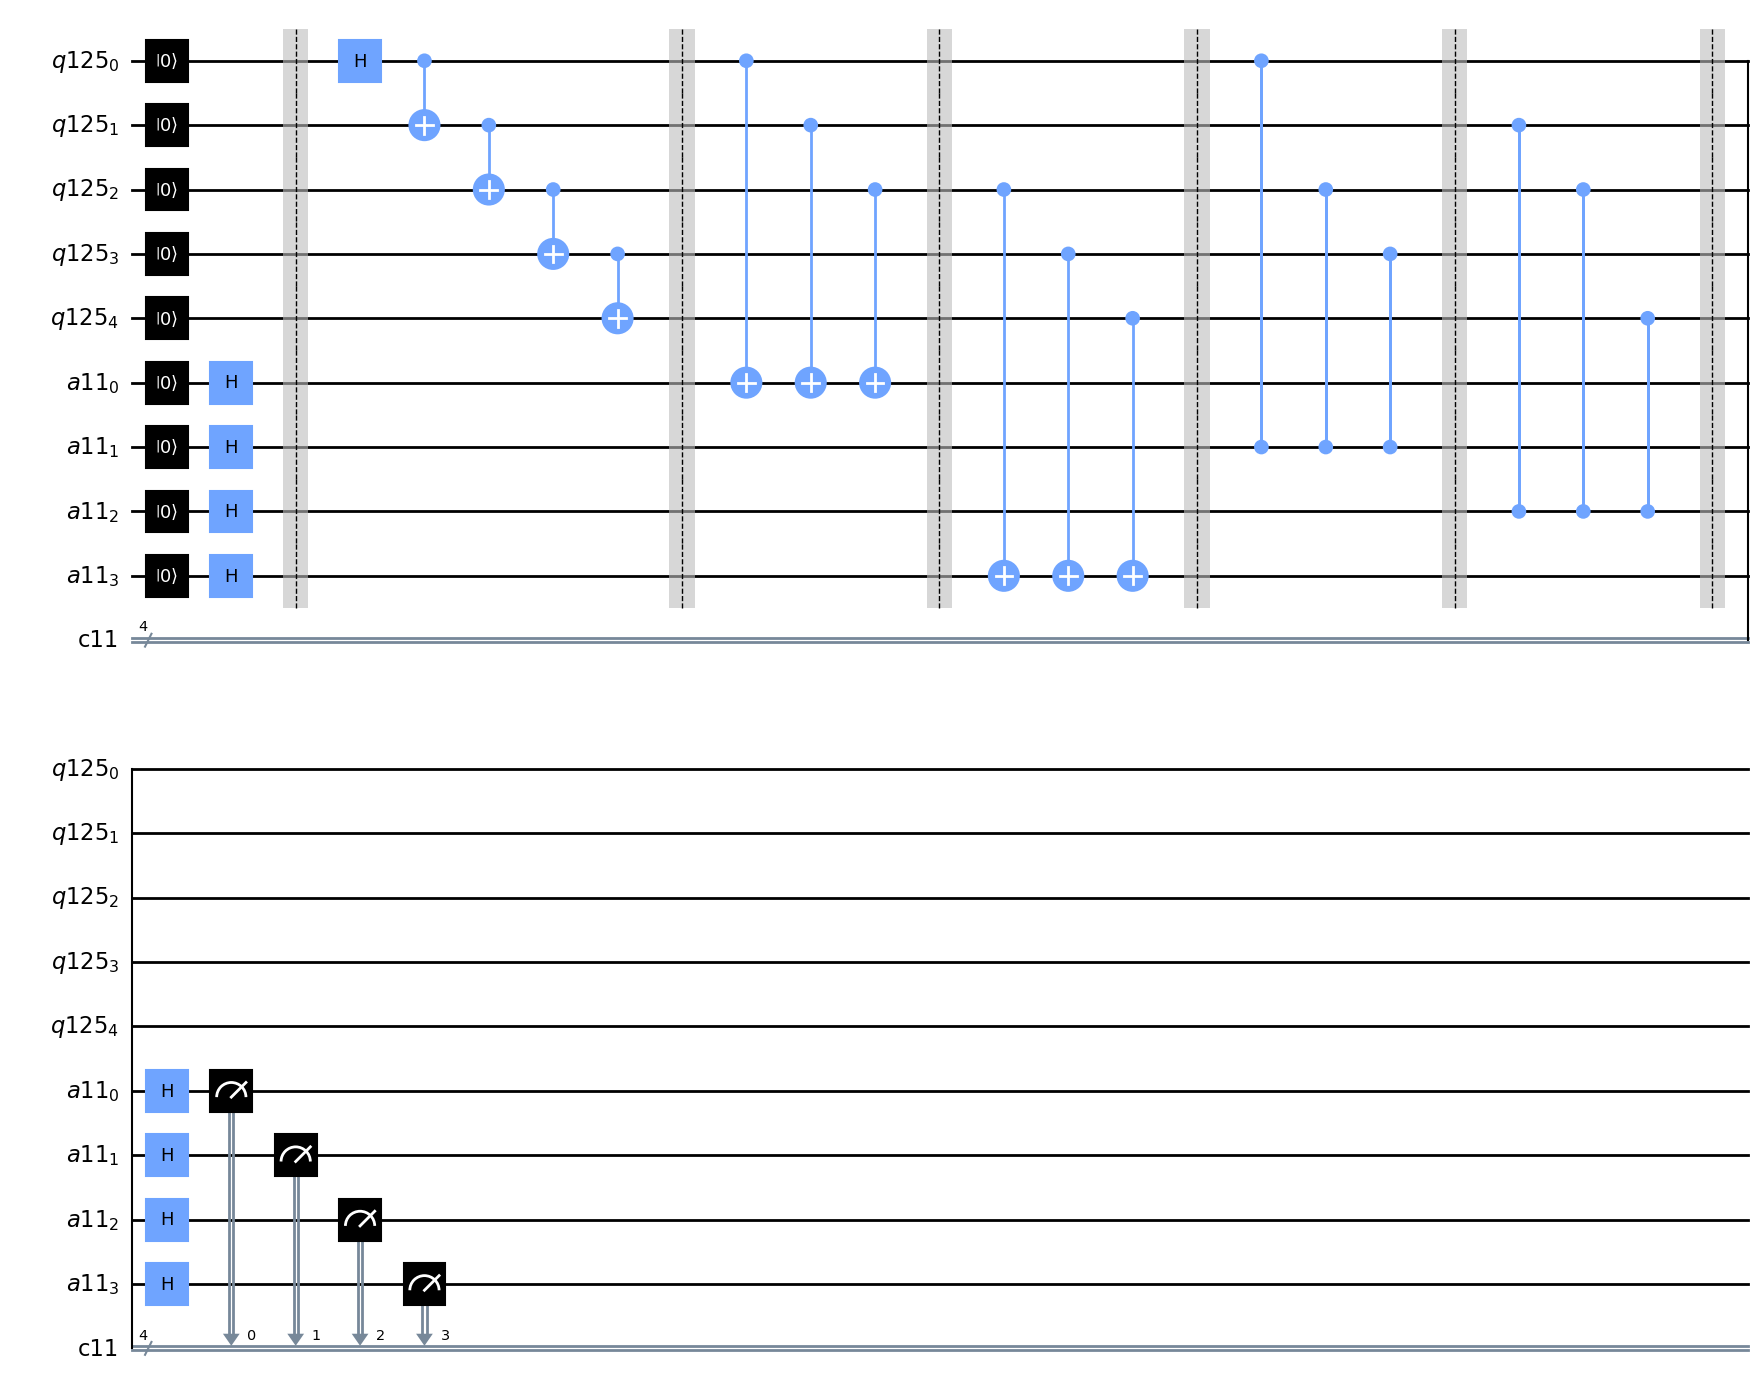

In [115]:
q_circuit.draw(output='mpl')

## Plot the graphs

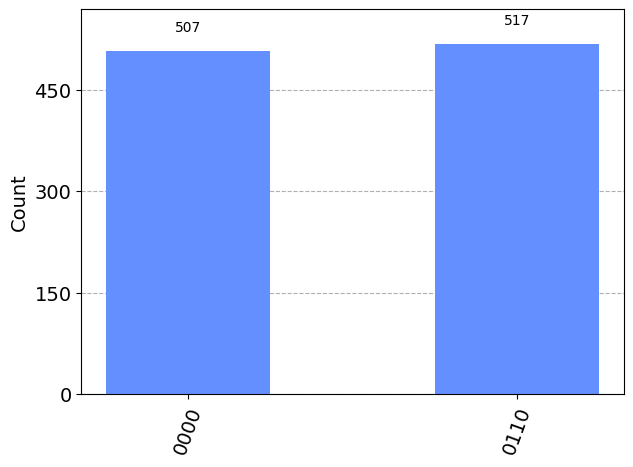

In [116]:
result = execute(q_circuit, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts(q_circuit))

In [117]:
# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(q_circuit, backend)).result()
psi  = result.get_statevector(q_circuit)

plot_state_qsphere(psi)

MissingOptionalLibraryError: "The 'seaborn' library is required to use 'plot_state_qsphere'. You can install it with 'pip install seaborn'."

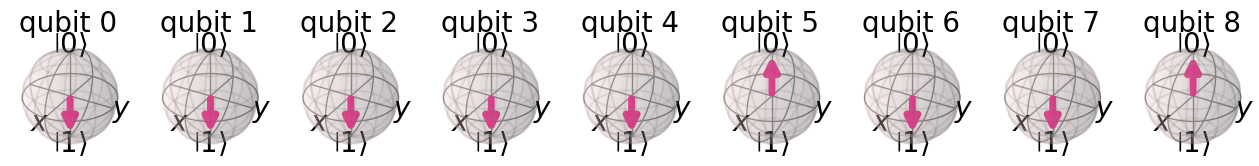

In [118]:
plot_bloch_multivector(psi)